In [1]:
# plan: create a normalisation sinogram (use one ready made)
# try to reconstruct with norm sino instead of norm components

In [2]:
normhdr = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normalised_sinograms/intermediates/CylinderPET-00/norm3d_00.h33"
norm_data = normhdr.replace(".h33", ".a")

In [3]:
import kex_data

In [4]:
mhdr = kex_data.get_sino_mainhdrs()[0]
print(mhdr)

C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00-sino.mhdr


In [5]:
import filefit

In [6]:
output_dir = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normfactors"
filefit.prep_folder(output_dir, [normhdr, norm_data]) #do some manual changes
output= filefit.refolder_path(output_dir, mhdr)
normhdr = filefit.refolder_path(output_dir, normhdr)

In [7]:
import e7tools
import importlib
importlib.reload(e7tools)

<module 'e7tools' from 'C:\\Users\\petct\\Desktop\\Hugo\\Code\\PythonMEX\\e7tools.py'>

In [8]:
print("returncode: ", e7tools.kex_recon(mhdr, normhdr, output, verbose=True))

stdout
 b''
stderr
 b"I 06/02/2020 11:02:17.140 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 11:02:17.140 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 11:02:17.140 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 11:02:17.140 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 11:02:17.140 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 11:02:17.140 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 11:02:17.140 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 11:02:17.140 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 11:02:17.658 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 11:02:17.659 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 11:02:17.659 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 11:02:17.659 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 11:02:17.659 (UTC+01:0

In [9]:
# try with uniform norm components
normhdr = kex_data.NORM_PATH
print(normhdr)
norm_data = normhdr.replace(".hdr", "")
print(norm_data)
filefit.prep_folder(output_dir, [normhdr, norm_data])
def refolder(path):
    return filefit.refolder_path(output_dir, path)
uniform_norm_hdr = refolder(normhdr)
uniform_norm_data = refolder(norm_data)

C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr
C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n


In [10]:
import numpy as np
with open(uniform_norm_data, 'rb') as f:
    norm_components = np.fromfile(f, dtype=np.float32)

In [45]:
N = len(norm_components)
print(N)
uniform_norm = 0.0001*(norm_components != 0)
uniform_norm = uniform_norm.astype(np.float32)

86905


In [46]:
with open(uniform_norm_data, 'wb') as f:
    f.write(uniform_norm)

In [47]:
with open(uniform_norm_data, 'rb') as f:
    open_uniform_norm = np.fromfile(f, dtype=np.float32)

In [48]:
print(open_uniform_norm) #should be all 1.s

[1.e-04 1.e-04 1.e-04 ... 0.e+00 0.e+00 0.e+00]


In [49]:
uniform_sino_mhdr = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/fake_sinograms/fake_sinogram.mhdr"
#print("returncode: ", e7tools.recon_intermediates(mhdr, normhdr, output))
norm_uniform_sino = output_dir + "/norm_uniform_sino.mhdr"
print("returncode: ", e7tools.recon_intermediates(uniform_sino_mhdr, kex_data.NORM_PATH, norm_uniform_sino))

stdout
 b''
stderr
 b"I 06/02/2020 11:23:31.709 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 11:23:31.709 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 11:23:31.709 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 11:23:31.709 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 11:23:31.709 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 11:23:31.709 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 11:23:31.710 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 11:23:31.710 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 11:23:32.222 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 11:23:32.223 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 11:23:32.223 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 11:23:32.223 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 11:23:32.223 (UTC+01:0

In [53]:
norm_uniform_sino_path = norm_uniform_sino.replace(".mhdr", "_00.s")

In [54]:
import kex_headers
sino_data = filefit.get_data(norm_uniform_sino_path, kex_headers.LOR_HISTOGRAM_SHAPE, np.float32)

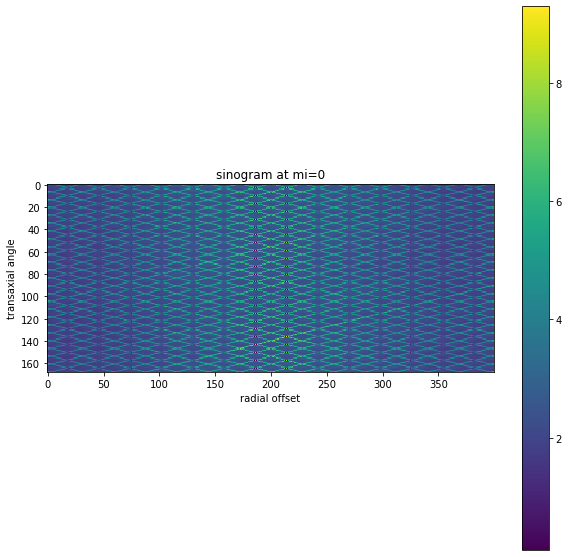

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(sino_data[0])
plt.xlabel('radial offset')
plt.ylabel('transaxial angle')
plt.title("sinogram at mi=0")
plt.colorbar()

In [56]:
oi_mhdr = output_dir+"/uniform_sino.mhdr"
e7tools.kex_recon(uniform_sino_mhdr, kex_data.NORM_PATH, oi_mhdr)

stdout
 b''
stderr
 b"I 06/02/2020 11:23:49.232 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 11:23:49.232 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 11:23:49.232 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 11:23:49.232 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 11:23:49.232 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 11:23:49.232 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 11:23:49.232 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 11:23:49.232 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 11:23:49.753 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 11:23:49.754 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 11:23:49.754 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 11:23:49.754 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 11:23:49.754 (UTC+01:0

0

In [57]:
v_file = output_dir + "/uniform_sino_000_000.v"
image = filefit.get_v_data(v_file)

Text(0.5, 1.0, 'normalized uniform sino')

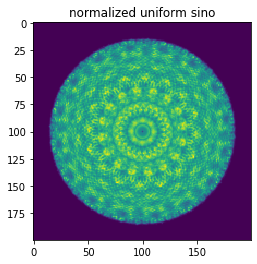

In [58]:
plt.imshow(image[50])
plt.title("normalized uniform sino")

In [59]:
unu_sino_mhdr = output_dir+"/uniform_norm_on_uniform_sino.mhdr"
e7tools.kex_recon(uniform_sino_mhdr, uniform_norm_hdr, unu_sino_mhdr)

stdout
 b''
stderr
 b"I 06/02/2020 11:24:22.323 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 11:24:22.323 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 11:24:22.323 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 11:24:22.324 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 11:24:22.324 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 11:24:22.324 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 11:24:22.324 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 11:24:22.324 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 11:24:22.568 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 11:24:22.569 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 11:24:22.569 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 11:24:22.569 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 11:24:22.569 (UTC+01:0

0

C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normfactors/uniform_norm_on_uniform_sino_000_000.v


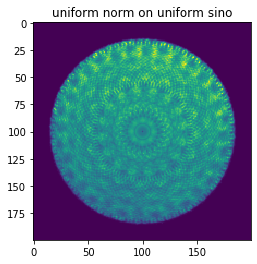

In [66]:
unu_v_path = unu_sino_mhdr.replace(".mhdr", "_000_000.v")
print(unu_v_path)
unu_image = filefit.get_v_data(unu_v_path)
plt.imshow(unu_image[50])
plt.title("uniform norm on uniform sino");

In [61]:
print(norm_uniform_sino_path)

C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normfactors/norm_uniform_sino_00.s


In [72]:
with open(norm_uniform_sino_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float32)
data = data.astype(np.uint16)
LORshape = kex_headers.LOR_HISTOGRAM_SHAPE
size = np.prod(LORshape)
data3d = np.reshape(data[:size], newshape=LORshape)
data4d = np.zeros(kex_headers.HISTOGRAM_SHAPE, dtype=np.uint16)
for tofbin in range(1):
    data4d[tofbin] = data3d

repackaged_norm_sino = kex_data.get_sino_paths()[0]
repackaged_norm_sino = filefit.refolder_path(output_dir, repackaged_norm_sino)
with open(repackaged_norm_sino, 'wb') as f:
    f.write(data4d)
    
mhdr = kex_data.get_sino_mainhdrs()[0]
hdr = kex_data.get_sino_hdrs()[0]
filefit.prep_folder(output_dir, [hdr, mhdr])

In [73]:
norm_uniform_sino_mhdr = filefit.refolder_path(output_dir, mhdr)

In [74]:
prenorm_mhdr = output_dir+"/pre_normalized.mhdr"
e7tools.kex_recon(norm_uniform_sino_mhdr, uniform_norm_hdr, prenorm_mhdr)

stdout
 b''
stderr
 b"I 06/02/2020 11:32:32.047 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 11:32:32.047 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 11:32:32.047 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 11:32:32.047 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 11:32:32.047 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 11:32:32.048 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 11:32:32.048 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 11:32:32.048 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 11:32:32.280 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 11:32:32.281 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 11:32:32.281 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 11:32:32.281 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 11:32:32.281 (UTC+01:0

0

C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normfactors/pre_normalized_000_000.v


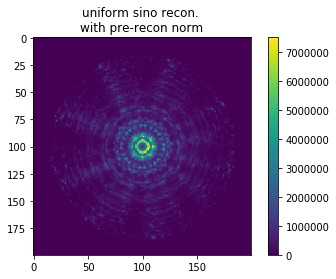

In [75]:
prenorm_v_path = prenorm_mhdr.replace(".mhdr", "_000_000.v")
print(prenorm_v_path)
prenorm_image = filefit.get_v_data(prenorm_v_path)
plt.imshow(np.sum(prenorm_image, axis=0))
plt.colorbar()
plt.title("uniform sino recon. \nwith pre-recon norm");